## **Objects in Python**
This is the last notebook on object-oriented programming in Python. The subject of this notebook is the object, you might think this is a bit odd, after all objects have been the focus of all the notebooks. Though this is true our discussions on objects have been superficial, the object is the very core of Python as a programming language. Knowing how to manipulate objects in Python allows you to be a much more efficient and effective programmer.

All object-oriented programming languages have objects, hence the name of course. An object is not much more than an allocated space in memory (on the heap), it has identification, a human readable name, it would be difficult to identify an object by its memory address. Finally, an object has the structure of a tagged tuple, a manner with which the object is constructed. The Python object is a mix of a C++ struct and a modula3 object. This mix delivers a flexible construct. A Python object is easy to use, easy to manipulate, but also quite difficult to protect from abuse. 

In Python literally everything is an object, and everything is a subclass of object (If you don't know what a subclass is, this notebook is not for you, you should read the Inheritance notebook). Quite often you will see the base / sub class relation being made explicit by a line of code like this.

`class ExampleOne(object):` 

The object is always the root of the directed acyclic graph (DAG) that is the Python object hierarchy. 

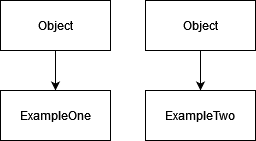

I have put the objects next to each other on purpose, for although Python has only one DAG you should consider object not to be the root, ExampleOne and ExampleTwo are not siblings. Instead you want to work with multiple object hierarchies.

The meaning of `class ExampleOne(object):` is that this class ExampleOne has no other superclass than object itself. I think you should not make this relation explicit and use `class ExampleOne:`.  Object is not part of the class hierarchy you will create.

I call the former explicit declaration, Google style, for I seem to recollect that at one time it stated in the Google Python style guide it was said to make this relationship explicit. I can't find it the current style guide so I might be wrong or they might have changed the style. However, using a style guide and a linter is a good idea, and why not use Google's style guide. See https://google.github.io/styleguide/pyguide.html.

Pylint is an example of a linter, pylint will give you advice on style and substance, make your code both less prone to bugs and much more readable for fellow programmers.

## **class objects & instance objects** 

There are two forms of object-oriented programming, there is the prototype programming, mostly known from JavaScript and other ECMA script dialects, and there is class based programming. Python is class based. As everything in Python is an object, Python objects come in two flavours:

 * class object
 * instance object
 
The first to understand is the class object, the class object has two roles:

 1. to function as blueprint of all objects belonging to this class. 
 2. The second role is to create objects of this class. 
 
For the first role class defines & names attribute references, in doing so it creates the namespace of the object. A namespace is a set of signs (names) that are used to identify and refer to the attributes the object has. The use of the namespace is that it ensures names can reused over multiple objects, iff the object identifiers are unique. We can access the attributes by using the object identifier and the name. 

`ExampleOne.variable` & `ExampleTwo.variable`

Python class objects have three types of attributes:

 1. Instance variables (confusingly so perhaps, these are mostly referred to as attributes in OO-speak)
 2. Class variables
 3. Methods

Methods we can further subdivide in:
 * regular methods
 * class methods
 * static methods
 
Python also knows an abstract method but that belongs to the abc module not the class object itself.

Let's see a class object.


In [ ]:
class ExampleOne:
    '''an example class we can inspect.'''
    classvar:int = 1
    
    def __init__(self, nr:int, text:str)->None:
        self.nr = nr
        self.text = text
        


It is important to understand that a class object functions as a blueprint for all objects of this class. 

The other goal of the class object is to instantiate the object, that is to create it in memory with a unique identifier and the instance variables being assigned a value.

The difference between an class object and an instance object is that the latter only lives in memory. If the computer is off, the object does not exist. This in contrast to the class object that lives in program code stored on some sort of medium, usually a hard disk. 

In [ ]:
one = ExampleOne(nr=7, text='This is an instance object')

The first step is a call to a special method named `__new__`, this will create a new object with a memory address 

The return value of new is an object an instance object of its class

We can inspect that our object has a memory location via the `id()` function.

In [ ]:
id(one)

In [ ]:
help(ExampleOne)

Python has an excellent help function that is I feel often under used. 

The help function tells us most of what we want to know about a class object.

 * line 1: class ExampleOne(builtins.object) - tells us that ExampleOne has no super classes other than object, object is the superclass to all other objects, it is the object that Python built-in.
 * line 2: ExampleOne(nr: int, text: str) -> None - This is the code we need to execute to create the object, this will call the static method `__new__`. The astute observer will have noticed we do not define that method, we inherit it from builtins.object.
 * line 3: an example class we can inspect - The message the author wants to give the user of the class, it makes the intent of the class clear. You should read the Google style guide for how to properly comment on your code.
 * line 4: Methods defined here: - names the methods we have defined for our class object
 * line 5: `__init__(self, nr: int, text: str) -> None` - initialize self, the object
 * line 6:  Data descriptors defined here: - similar to line 4 but instead of naming the methods defined in our class objects, it names the data descriptors we have defined here. For now, it is only important to remember that the instance variables are kept in a dictionary, one that can be called on with the name `__dict__`. I will show you how to do that in a moment and will discuss data descriptors in depth later in this notebook.
 * line 7: We are going to skip weak references here. I will quickly explain them at the end of this notebook.
 * line 8: Data and other attributes defined here: - functions similar to line four and six, but now it refers to the other data, such as the class variable we have named, including the value, see line 10. And a dict giving the annotations we have used for our class variable, see line 9.

All this information we have received from help. There is more to help but we will see that later. For now you should understand that you can use this information in your programming. We can access the instance variables of any object by calling its dict.


In [ ]:
one.__dict__

We can change the value of attributes by accessing the dictionary directly. 

This might seem like something you should not do, but if you become experienced in Python this is probably something you want to do. I will some uses of this later, when we move into descriptors.

In [ ]:
one.__dict__['text'] = 'This is a very different example'

In [ ]:
one.text

In [ ]:
one.__annotations__

In [ ]:
one.classvar

In [ ]:
class ExampleTwo:
    '''This is an example class with given instantiation values'''
    
    def __init__(self)->None:
        self.number = 5
        self.txt = 'Second a silver lining'
        
    def __repr__(self)->str:
        return f'{self.__class__.__name__} has two data attributes: {self.number} & {self.txt}'
    
    def __str__(self)->str:
        return f'This is a very different object'
    
    def text(self):
        return self.txt

In [ ]:
snd = ExampleTwo()

#### **instance object** 
`snd`is the second flavour of objects Python has, it is the object instance. The instance object can really only do one thing, it can do attribute references.

There are two types of attribute references, method references and data references.

Let me begin by calling help to see what is all in there, and what is not.

In [ ]:
help(type(snd))

As you can see there are four methods defined in the class object.

There are data descriptors, they will be given a standard start value at initialization.

There are no other data, no annotations nothing.

`snd` can only do attribute reference, meaning I can call the instance attributes

In [ ]:
snd.number

In [ ]:
snd.txt

and I can call the methods

In [ ]:
print(snd)

In [ ]:
snd

In [ ]:
snd.text()

If we inspect the code of `__repr__` a bit closer we see that I call `self.__class__.__name__` in the format string. 

Consider that line of code, apperently there are more attributes

In [ ]:
snd.__class__

In [ ]:
snd.__class__.__name__

Of course this is circular it is akin to:

In [ ]:
type(snd)

In [ ]:
type(snd).__name__

The function `type` basically calls the attribute `__class__` on its argument. 

All built-in functions in Python have this relationship with a special method e.g., `print` with `__str__` and `repr` with `__repr__`. 

To understand where this comes from we would have to look back at `object`.

`object` comes with a host of method attributes. These are called special methods and have a prefix and suffix of a double underscore, known in Python talk as a dunder. We have already seen two special methods: `__new__` and `__init__` but it has quite a few more, too many for me to list. You should look at the Python data model to see all of them and how to use them for effective Python programming. https://docs.python.org/3/reference/datamodel.html#special-method-names 

In this notebook I can only show you a few of them ones that allow you to do surprising things in Python. 

Though you inherit all these methods, after all everything is a subclass of `object`, however not all these methods are implemented. 

`object` also comes with special (data) attributes. For instance `__name__` is a special attribute, again all other classes inherit `__name__` from `object`.


In [ ]:
object.__name__

In [ ]:
object.__qualname__

We have already seen a special data attribute in action.

In [ ]:
one.__dict__

We can see most (not all don't ask me why) methods defined for an object if we call on `dir(object)`

In [ ]:
dir(object)

Most of these I am not going to discuss here, for they have very specific roles in Python. 

The special methods that control the basic operations of an object are:

 * `__new__`
 * `__init__`
 * `__del__`

These are responsible for creation and deletion of an object. I have discussed the first two, (there is more to know) but haven't really discussed `__del__` which is called when we want the instance object to be destroyed.

In [ ]:
id(snd)

id is not the actual hexadecimal memory address instead it is a more readable integer. 

The CPython interpreter uses converts this integer to hexidecimal  memory address of the object on the heap

A non-overridden version of `__repr__` will give you the hexadecimal

In [ ]:
repr(one)

In [ ]:
del(snd)

In [ ]:
id(snd)

## **Member Access Control & Attribute Validation** 

I learned OO-programming in Java and as such I have a slightly different understanding of object than a Python trained programmer. For a Python trained programmer an object is what we described above, a tagged tuple, with attributes, that functions as blueprint, or a location in memory with a unique identifier that can reference attributes.

For me as a trained Java programmer this definition is incomplete. I would say that a class is a tagged tuple with members, being attributes methods, and member access control. An object would be basically the same definition. Where Python has method and data attributes, Java seperates them in terminology and has attributes and methods. 

A Java class reads different from a Python class, the difference is twofold:

 1. Java is a static typed language
 2. Jave defines member access control.

A Java class will look like the following code:

In [ ]:
class Bicycle {
    # don't run this cell it is Java not Python
  // attribute    
  private int gear = 5;

  // method   
  public void braking() {    
    System.out.println("Braking");   
   }
} 


As you can see a Java class is very similar to a Python, loose from some syntax, the clear difference is in typing and in member access control.

Java enforces typing (by the compiler), this is the reason why it is general faster, less prone to bugs, but also more difficult to learn and verbose. 

Java also enforces member access control, with the keywords private, protected, *no modifier*, and public. This in order of strictness. Java data attributes are usually private, meaning you cannot access them outside the class itself. Public is the same member access as Python has, pretty much unlimited access. 

The fact that Java knows member access control & static typing makes it easy to validate attributes both on type and value. There are compelling reasons why you want to control the validity of especially data attributes. Attributes determine the state of an object. What if we want to avoid undesireable states, states where attributes cannot have certain values, for these values will lead to unwanted behaviour or bugs. On a higher level, we want to avoid dependecies on implementations. A user of an API for instance, should not depend on the implementation of the methods presented in the API.

Of course Python has the "private" variable but those are not really private as you know. This lack of built-in member access makes it more difficult in Python to validate attributes. Therefore you will see quite often attributes "validated"with a error for type and an if/else for value. See the code below

In [1]:
class LineItem:
    
    def __init__(self,description:str, weight:float, price:float)->None:
        self.description = description
        self.weight = weight
        self.price  = price
    
    def subtotal(self)->float:
        return round(self.weight * self.price,2)    

In [2]:
oranges = LineItem(description='oranges', weight=1.6, price=3.17)
oranges.subtotal()

5.07

This code works but has some obvious flaws:
 1. Weight and price cannot be negative
 2. We state that weight & price are of type float but we do not validate that
 
How to overcome these flaws, with all you have read sofar, do you think the following code suffices?

In [3]:
from typing import Union

numeric = Union[float, int]
numeric_values = set([float, int])

class LineItem:
    '''This class contains Line Items for a super market cash register system'''
    
    arg_neg = 'we cannot have negative weights and/or prices, please adjust the argument accordingly'
    arg_type = 'The wrong types are used, please check the types of your arguments.'
    
    def __init__(self,description:str, weight:numeric, price:numeric)->None:
        if type(description) == str and type(weight) in numeric_values and type(price) in numeric_values:
            if weight >= 0 and price >=0:
                self._description = description
                self._weight = weight
                self._price  = price
            else:
                raise ValueError(self.arg_neg) 
        else:
            raise TypeError(self.arg_type)
            
    def set_price(self,value:numeric)->None:
        if type(value) in numeric_values:
            if value >= 0:
                self._price = value
            else:
                raise ValueError(self.arg_neg)
        else:
            raise TypeError(self.arg_type)
            
    def set_weight(self,value:numeric)->None:
        if type(value) in numeric_values:
            if value >= 0:
                self._weight = value
            else:
                raise ValueError(self.arg_neg)
        else:
            raise TypeError(self.arg_type)
                
    def subtotal(self)->float:
        return round(self._weight * self._price,2)    
    
    def __repr__(self)->str:
        return f'{self.__class__.__name__}:{self.__dict__}'

In [4]:
oranges = LineItem(description='oranges', weight=1.6, price=3.17)

In [5]:
bananas = LineItem(description='bananas', weight=1.6, price='an awful lot')

TypeError: The wrong types are used, please check the types of your arguments.

In [6]:
herons = LineItem(description='herons', weight=1.6, price=1)

In [7]:
herons._price = -10

In [8]:
herons.subtotal()

-16.0

#### **Properties**

This pretty much the very best I can do to prevent Python from making objects that are incorrect. However there is nothing I can do to prevent someone from accessing `LineItem`'s data attributes directly, and as such still being open for incorrect values for attributes. That Python attributes are directly accessable via Classinstance.attribute, potentionally makes all my previous validation work is useless. 

Luckily Python has options for attribute validation that are better than the ones I just present here. One of the possibilities Python offers us is to use properties. That can do what we just did, but a bit better, because

The built-in function `property(fget=None, fset=None, fdel=None, doc=None)` returns a property attribute. A property attribute is a class method that manages instance attributes, by giving it a getter, setter and deleter. In other words it is code that manages code, a form of meta programming. As I already wrote languages like Java and C++ you in general do not expose attributes to others, you keep them private and access them via an accessor or a mutator (your getter and setters) this allows you to validate attributes. Property gives you similar control over data attributes in Python.

In [9]:
from typing import Union, Optional

numeric = Union[float, int]
numeric_values = set([float, int])
                
class LineItem:
    '''
        This class is for LineItems in a super market cash register system.
    '''
    
    arg_neg = 'we cannot have negative weights and/or prices, please adjust the argument accordingly'
    arg_type = 'The wrong types are used, please check the types of your arguments.'

        
    def __init__(self,description:str, price:numeric, weight:numeric)->None:
        self._description = description
        self.weight = weight
        self.price = price
    
    @property
    def weight(self)->float:
        return self.__weight
        
    @weight.setter
    def weight(self, value:numeric)->None:
        if type(value) in numeric_values:
            if value >= 0:
                self.__weight = value
            else:
                raise ValueError(self.arg_neg)
        else:
            raise TypeError(self.arg_type)
            
    @property
    def price(self)->None:
        return self.__price
    
    @price.setter
    def price(self,value:numeric)->None:
        if type(value) in numeric_values:
            if value >= 0:
                self.__price = value
            else:
                raise ValueError(self.arg_neg)
        else:
            raise TypeError(self.arg_type)
        
                
    def subtotal(self)->float:
        return round(self.weight * self.price,2)    
    
    def __repr__(self)->str:
        return f'{self.__class__.__name__}:{self.__dict__}'
                    

In [10]:
apples = LineItem(description='apples', price=2.78, weight=1)
apples

LineItem:{'_description': 'apples', '_LineItem__weight': 1, '_LineItem__price': 2.78}

In [11]:
apples.price= -2.78

ValueError: we cannot have negative weights and/or prices, please adjust the argument accordingly

You do not have to use a decorator, I could have used the function `property()` itself, 
but I find this clearer less in need of comment. I will refactor eventually and not use the decorator.

`@property` even controls the instantiation of the object of our object. 

In [12]:
beer = LineItem(description='beer', price=1.11, weight='bottle')
beer

TypeError: The wrong types are used, please check the types of your arguments.

All in all the use of property is good way to prevent accidents.

It is even sufficient to stop people who understand Python from doing malicious things.

In [13]:
apples = LineItem(description='apples', price=2.78, weight=1)
apples

LineItem:{'_description': 'apples', '_LineItem__weight': 1, '_LineItem__price': 2.78}

In [14]:
apples.__dict__

{'_description': 'apples', '_LineItem__weight': 1, '_LineItem__price': 2.78}

In [15]:
apples['_LineItem__price']=-2.78

TypeError: 'LineItem' object does not support item assignment

The only comment I have is that code is not very DRY. Let me refactor the code a bit.

In [17]:
from typing import Union, Optional, Any

numeric = Union[float, int]
numeric_values = set([float, int])
                
class LineItem:
    '''
        This class is for LineItems in a super market cash register system.
        The attribute validation for initialization is done by the factory class
        DO NOT CREATE LineItems DIRECTLY, USE THE FACTORY!!!
    '''
    
    arg_neg = 'we cannot have negative weights and/or prices, please adjust the argument accordingly'
    arg_type = 'The wrong types are used, please check the types of your arguments.'

        
    def __init__(self,description:str, price:numeric, weight:numeric)->None:
        self._description = description
        self.weight = weight
        self.price = price
     
    def attribute_manager(attr_name:str)->property: 
        
        def getter(instance)->Any:
            return instance.__dict__[attr_name]
        
        def setter(instance, value)->None:
            if type(value) in numeric_values:
                if value >= 0:
                    instance.__dict__[attr_name] = value
                else:
                    raise ValueError(instance.arg_neg)
            else:
                raise TypeError(instance.arg_type)
        
        return property(getter, setter)
    
    weight = attribute_manager('weight')
    price = attribute_manager('price')
    
                
    def subtotal(self)->float:
        return round(self.weight * self.price,2)    
    
    def __repr__(self)->str:
        return f'{self.__class__.__name__}:{self.__dict__}'    

#### **inspecting the final result**
Now this code is mean and lean, it is even much easier to expand this class, I would just have to add an attribute, and bind it to the attribute_manager method. Before we try it let me give some comment, for this code is not easy to grasp.

We will start with property, I have used property as a decorator in the previous examples, here I do not, I use it as a function, even worse I use it as a return type of the method attribute_manager. `property()` is a built-in function of Python, functions in Python are "first class citizens" meaning they can be argument and return type to other function/methods. 

class property(fget=None, fset=None, fdel=None, doc=None) takes 4 arguments, defaults can be None, and it returns a property attribute.As you can see as return the method attribute_manager returns a property object with as attributes two functions, `fget=getter` and `fset=setter`. 

Both functions are inner functions of attribute_manager and know no self. Here this solved by givinging both functions instance, as you know an object is an instance of a class, this will just be replaced when called with an instance object by self. I cannot use self as that is a protected keyword in Python.   

Finally we go deep into Python itself, and use the attr_name to go straight in to the dictionary and retrieve or assign the value of the attribute.

In [20]:
from typing import Union, Optional, Any

numeric = Union[float, int]
numeric_values = set([float, int])
                
class LineItem:
    '''
        This class is for LineItems in a super market cash register system.
        The attribute validation for initialization is done by the factory class
        DO NOT CREATE LineItems DIRECTLY, USE THE FACTORY!!!
    '''
    
    arg_neg = 'we cannot have negative weights and/or prices, please adjust the argument accordingly'
    arg_type = 'The wrong types are used, please check the types of your arguments.'

        
    def __init__(self,description:str, price:numeric, weight:numeric, code:int=None)->None:
        self._description = description
        self.weight = weight
        self.price = price
        self.code = code
     
    def attribute_manager(attr_name:str)->property: 
        
        def getter(instance)->Any:
            return instance.__dict__[attr_name]
        
        def setter(instance, value)->None:
            if type(value) in numeric_values:
                if value >= 0:
                    instance.__dict__[attr_name] = value
                else:
                    raise ValueError(instance.arg_neg)
            else:
                raise TypeError(instance.arg_type)
        
        return property(getter, setter)
    
    weight = attribute_manager('weight')
    price = attribute_manager('price')
    code = attribute_manager('code')
    
                
    def subtotal(self)->float:
        return round(self.weight * self.price,2)    
    
    def __repr__(self)->str:
        return f'{self.__class__.__name__}:{self.__dict__}'
        

In [21]:
steak = LineItem(description='steak', price=23.59, weight=0.5, code=237)
steak

LineItem:{'_description': 'steak', 'weight': 0.5, 'price': 23.59, 'code': 237}

In [22]:
steak.code = 'delicious'

TypeError: The wrong types are used, please check the types of your arguments.

#### **Using properties in APIs**
This code works as expected, we have come a long way from our first attempt by using Python "private" attributes. Now we are able to sufficiently protect our class from abuse and unnecessary object creation. 

But more we can now seperate the underlying implementation of code from its public interface. This is important, for in modular programming like object oriented programming you use a lot of code written by others, and your code might be used by others. You do not want to dependend on the implementation, just on the public signature of a method. Let me give you an example.

Imagine we are creating a linear algebra API, in it we create a vector class. Now we have multiple ways in representing vectors. A common way of representing a vector is as tuple (2,4) which is a vector that leaves from some point usually the origin and goes two in the x-direction and four in the y-direction in an Eucleadian plane. 

We might program the class as such:

In [23]:
class Vector:
    '''This is class that represents a two dimensional vector'''
    error = 'The type of the data attributes needs to be an int'
    
    def __init__(self, x:int, y:int)->None:
        if type(x) == int and type(y) == int:
            self._x = x
            self._y = y
        else:
            raise TypeError(self.error)
        
    def getx(self)->int:
        return self._x
    
    def setx(self, value:int)->None:
        if type(value) == int:
            self._x = value
        else:
            raise TypeError(self.error)
            
    def gety(self)->int:
        return self._y
    
    def sety(self, value:int)->None:
        if type(value) == int:
            self._y = value
        else:
            raise TypeError(self.error)
            
    def __str__(self)->str:
        return f'({self._x},{self._y})'
    
    def __repr__(self)->str:
        return f'{self.__class__.__name__}[x={self._x},y={self._y}'

In [24]:
vec1 = Vector(3,7)
print(vec1)

(3,7)


In [25]:
vec1

Vector[x=3,y=7

In [26]:
vec2 = Vector(3.7,8)

TypeError: The type of the data attributes needs to be an int

This is still probably the manner in which programming in Python is done a lot. 

We dependend on the conventention that an attribute with an underscore is private and should not be accessed directly. However the user of our API might not care or know of this convention and do this.

In [27]:
vec1._x = 6
print(vec1)

(6,7)


We have changed the vector and this is fine & the absolute correct way of doing this if our implemetation of a vector is a point.

However we are now completely dependent on the implementation of that vecor as a point. What happens if we want to change our representation to physics notation ($\hat i + \hat j + \hat k$) Where $\hat i = \begin{matrix} 1 \\ 0  \end{matrix}$ and $\hat j = \begin{matrix}0 \\ 1  \end{matrix}$ so our two dimensional representation actually becomes $ x = s \times \begin{matrix} 1 \\ 0  \end{matrix}$ and $ y = s \times \begin{matrix} 0 \\ 1  \end{matrix}$ where s is some scalar.

In [28]:
class Vector:
    '''This is class that represents a two dimensional vector'''
    error = 'The type of the data attributes needs to be an int'
    
    def __init__(self, x:int, y:int)->None:
        if type(x) == int and type(y) == int:
            self._x = [x,0]
            self._y = [0,y]
        else:
            raise TypeError(self.error)
        
    def getx(self)->int:
        return self._x[0]
    
    def setx(self, value:int)->None:
        if type(value) == int:
            self._x[0] = value
        else:
            raise TypeError(self.error)
            
    def gety(self)->int:
        return self._y[1]
    
    def sety(self, value:int)->None:
        if type(value) == int:
            self._y[1] = value
        else:
            raise TypeError(self.error)
            
    def __str__(self)->str:
        return f'({self._x[0]},{self._y[1]})'
    
    def __repr__(self)->str:
        return f'{self.__class__.__name__}[x={self._x[0]},y={self._y[1]}]'

In [29]:
vec3 = Vector(3,5)
print(vec3)

(3,5)


In [30]:
vec3.sety(7)
print(vec3)

(3,7)


In [31]:
vec3._x = 5

In [32]:
print(vec3)

TypeError: 'int' object is not subscriptable

The clients code is broken because we allowed the client to access our underlying code.

I believe it is the duty of the API author to make sure that the underlying representation is seperated from the public interface. 

With properties we can achieve this easily.

In [6]:
class Vector:
    '''This is class that represents a two dimensional vector'''
    error = 'The type of the data attributes needs to be an int'
    
    def __init__(self, x:int, y:int)->None:
        self.x_attribute = [x,0]
        self.y_attribute = [0,y]
           
    @property
    def x(self)->int:
        return self.x_attribute[0]
    
    @x.setter
    def x(self, value:int)->None:
        self.x_attribute[0] = value
        
    @property
    def y(self)->int:
        return self.y_attribute[1]
    
    @y.setter
    def y(self, value:int)->None:
        self.y_attribute[1] = value
            
    def __str__(self)->str:
        return f'({self.x_attribute[0]},{self.y_attribute[1]})'
    
    def __repr__(self)->str:
        return f'{self.__class__.__name__}[x={self.x_attribute[0]},y={self.y_attribute[1]}]'

In [7]:
vec4 = Vector(3,9)
print(vec4)

(3,9)


In [8]:
vec4.y = 5
print(vec4)

(3,5)


#### **"Python is a language of consenting adults"**

Alan Runyan of Plone (https://plone.org/) said that, and though I tend to agree it is better to be cautious when your are writing an API and not use `def x` as property and `_x` as data attribute name. Careless programmers (and there many of those unfortunately) might want to access your data attributes directly for that is the Python way, and fo go the reason you had to use properties in the first place.  

#### **Descriptors & the descriptor interface**
"Descriptors invert the relationship that the calling class determines look-up and allow the data that is being looked-up to have a say in the matter." Raymond Hettinger

A descriptor is what we call any object that defines `__get__`, `__set__`, or `__delete__`. This is very similar of course to the `property()` function that manages instance attributes, by giving it a getter, setter and deleter. Which isn't really a surprise because the property class implements the descriptor interface. However there is a difference property manages instance attributes, a descriptor only works with class variables.

The descriptor interface is why in Python we can bind functions to attribute names as I did before before with attribute_manager.

In [5]:
def times_two(n:int)->int:
    return n * 2
four = times_two

four(2)

4

#### **Descriptor definitions**
 * Descriptor class: The class implementing the descriptor protocol.
 * Managed class: The class where the descriptor instances are declared as class variables.
 * Descriptor instance: Each instance of the descriptor class declared as a class attribute of the managed class.
 * Managed instance: One instance of the managed class.
 * Storage attribute: An attribute of the managed instance that holds the value of the of a managed attribute for that particular instance.
 * Managed instance: A public attribute in the managed class that is handled by the descriptor instance with values stored in in storage attributes. 

In [9]:
class Quantity:
    '''Quantity is a descriptor class''' 
    
    def __init__(self, strorage_name:str):
        self.storage_name = strorage_name
    
    def __set__(self, instance:object, value:float)->None:
        if value >= 0:
            instance.__dict__[self.storage_name]=value #1
        else:
            raise ValueError(f'{self.storage_name} cannot be negative please adjust the argument accordingly')
            
    def __get__(self, instance:object, owner)->float: # 2
        if instance is None:
            return self # 3
        else:
            return instance.__dict__[self.storage_name]
        

#### A few remarks are necessary
 1. We need to inject the value directly into the `__dict__`if we would call `setattr(instance, self.storage_name)` we will just call `__set__`again. Leading to infinite recursion. 
 2. We must implement `__get__` because the name of the managed attribute might not be that same as that of the storage attribute. `gewicht = Quantity('weight')` and 'clever' people might access the stored attribute directly `class.weight`
 3. To support introspection it is considered good practice to return the descriptor instance when the managed attribute is accessed through the class

In [18]:
class LineItem:
    '''Line item is a managed class'''
    
    weight = Quantity('weight') # descriptor instance
    price = Quantity('price')   # dito
    
    def __init__(self, description:str, weight:float,price:float):
        self.description = description
        self.weight = weight 
        self.price = price   
        
    def subtotal(self)->float:
        return self.weight * self.price 
    
    def __repr__(self)->str:
        return f'{self.__class__.__name__}:{self.__dict__}'

In [19]:
cote_du_boeuf = LineItem('Cote du boeuf', 1200, 0.35) # managed instance
cote_du_boeuf 

LineItem:{'description': 'Cote du boeuf', 'weight': 1200, 'price': 0.35}

In [23]:
cote_du_boeuf.price = 34.85 

In [24]:
cote_du_boeuf

LineItem:{'description': 'Cote du boeuf', 'weight': 1200, 'price': 34.85}

In [25]:
cote_du_boeuf.weight = -1500

ValueError: weight cannot be negative please adjust the argument accordingly